In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from b2aiprep.dataset import VBAIDataset, BIDSDataset

In [34]:
vbai_dataset = VBAIDataset('C:\\Users\\krish\\Desktop\\B2AI\\bids_with_sensitive_recordings')
bids_dataset = BIDSDataset('C:\\Users\\krish\\Desktop\\B2AI\\bids_with_sensitive_recordings')

In [35]:
participant_df = vbai_dataset.load_and_pivot_questionnaire('participant')
demographic_df = vbai_dataset.load_and_pivot_questionnaire('qgenericdemographicsschema').drop_duplicates(subset='record_id', keep='first')

In [36]:
# Create a list of race columns
race_columns = [f'race___{i}' for i in range(1, 9)]

# Function to determine which race___ column is True
def determine_race(row):
    for col in race_columns:
        if row[col]:
            return col
    return np.nan  # Return NaN if none are True

# Apply the function to each row to create the 'RACE' column
demographic_df['RACE'] = demographic_df.apply(determine_race, axis=1)

# Display the updated DataFrame
print(demographic_df['RACE'])

0      race___5
2      race___5
3      race___5
4      race___5
5      race___2
         ...   
174    race___3
175    race___3
176    race___5
177    race___5
178    race___5
Name: RACE, Length: 176, dtype: object


In [48]:
# Convert the 'age' column to numeric, coercing errors to NaN
participant_df['age'] = pd.to_numeric(participant_df['age'], errors='coerce')
print(participant_df['age'].skew())
Q1 = participant_df['age'].quantile(0.25)
Q2 = participant_df['age'].quantile(0.5)
Q3 = participant_df['age'].quantile(0.75)

galton_skewness = ((Q3 - Q2) - (Q2 - Q1)) / (Q3 - Q1)

print(f"Galton's Skewness: {galton_skewness:.2f}")

# Define age bins and labels
bins = [18, 27, 37, 47, 57, 67, 77, 87, 97]  # Bins for ages
labels = ["18 - 27", "28 - 37", "38 - 47", "48 - 57", "58 - 67", "68 - 77", "78 - 87", "88 - 97"]  # Corresponding labels

# Use pd.cut to create the 'AGE' column with labels
participant_df['AGE'] = pd.cut(participant_df['age'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame
print(participant_df['AGE'])

-0.4625346886509947
Galton's Skewness: -0.19
0      68 - 77
1      28 - 37
2      78 - 87
3      48 - 57
4      18 - 27
        ...   
173    48 - 57
174    38 - 47
175    68 - 77
176    58 - 67
177    48 - 57
Name: AGE, Length: 178, dtype: category
Categories (8, object): ['18 - 27' < '28 - 37' < '38 - 47' < '48 - 57' < '58 - 67' < '68 - 77' < '78 - 87' < '88 - 97']


In [50]:
demographic_df['gender_identity'].unique()

array(['Male gender identity', 'Female gender identity',
       'Non-binary or genderqueer gender identity'], dtype=object)

In [39]:
participant_df['enrollment_institution'].unique()

array(['Mt. Sinai', 'VUMC', 'MIT', 'USF', 'WCM'], dtype=object)

In [40]:
# Merge the two DataFrames on the 'record_id' column
combined_df = pd.merge(participant_df, demographic_df, on='record_id', how='inner')
combined_df.to_csv('C:\\Users\\krish\\Desktop\\combined_df.csv')

# Display the resulting DataFrame
print(combined_df)

linkId                             record_id selected_language  \
0       01401050-e9dd-486e-b0d4-0001ee7f861d           English   
1       022c62b4-1b02-43f1-90cf-301b61eb406c           English   
2       0e2df8b3-a93f-4982-a82c-d96a5c64d153           English   
3       0ee1e1e1-0e86-42cc-9e9d-2cafd9f1e01c           English   
4       119daa75-d633-4f1f-9bec-d0650715b41f           English   
..                                       ...               ...   
171     fa6befa4-dece-4987-8612-67572aa6234b           English   
172     faaca476-b026-4db9-9127-1a216936cdf8           English   
173     fbccbc13-a9a8-4151-8fd0-5c5d65e073ec           English   
174     fdf560ee-c636-4261-a82b-1cf9a677ce8a           English   
175     fef8f989-e8a1-429e-8406-679f47215263           English   

linkId enrollment_institution   age eligible_studies___1 eligible_studies___2  \
0                   Mt. Sinai  73.0                False                 True   
1                        VUMC  32.0          

In [41]:
combined_df['gender_identity'].unique()

array(['Male gender identity', 'Female gender identity',
       'Non-binary or genderqueer gender identity'], dtype=object)

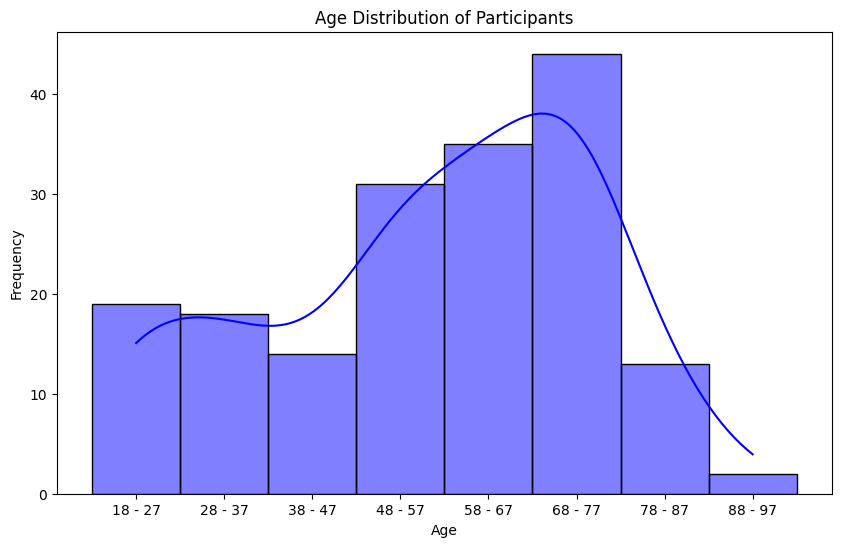

In [43]:
# Plotting the distribution of the age column
plt.figure(figsize=(10,6))

# Histogram
sns.histplot(combined_df['AGE'].dropna(), kde=True, bins=15, color='blue', edgecolor='black')

# Title and labels
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show plot
plt.show()

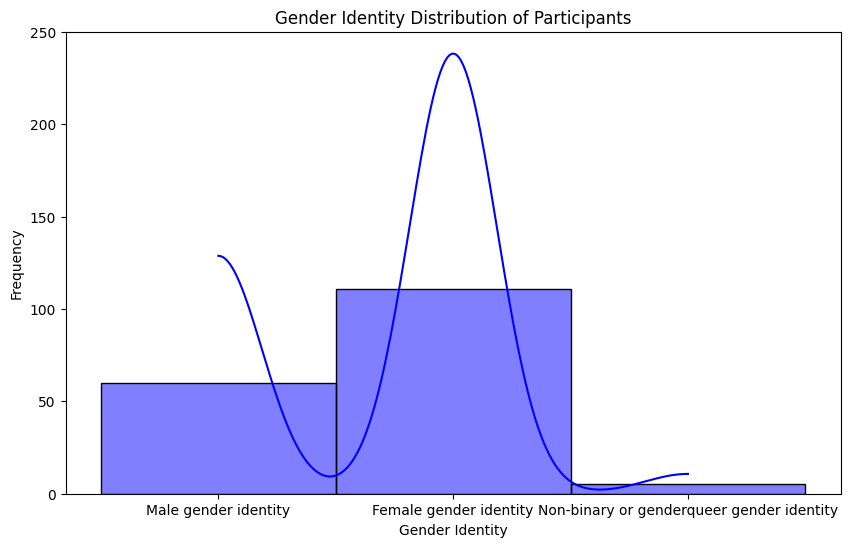

In [ ]:
# Plotting the distribution of the age column
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(combined_df['gender_identity'].dropna(), kde=True, bins=15, color='blue', edgecolor='black')

# Title and labels
plt.title('Gender Identity Distribution of Participants')
plt.xlabel('Gender Identity')
plt.ylabel('Frequency')

# Show plot
plt.show()

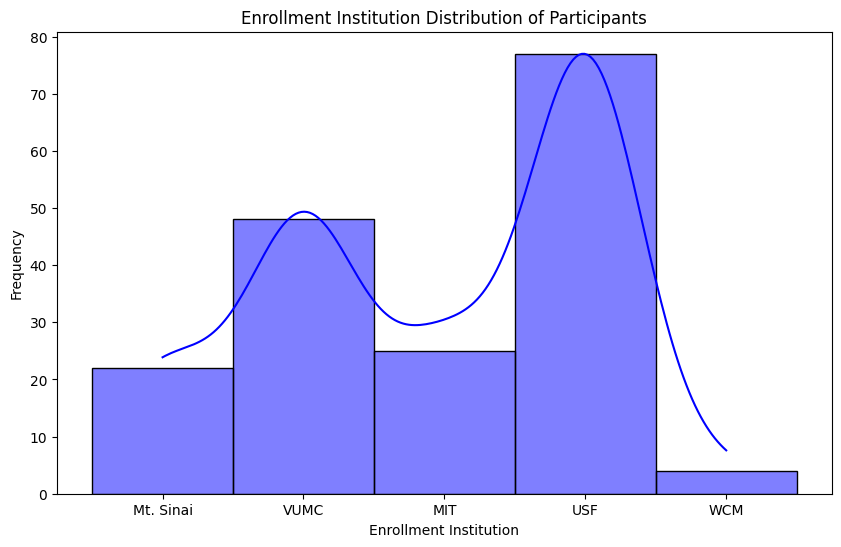

In [ ]:
# Plotting the distribution of the age column
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(combined_df['enrollment_institution'].dropna(), kde=True, bins=15, color='blue', edgecolor='black')

# Title and labels
plt.title('Enrollment Institution Distribution of Participants')
plt.xlabel('Enrollment Institution')
plt.ylabel('Frequency')

# Show plot
plt.show()

AGE                                        18 - 27  28 - 37  38 - 47  48 - 57  \
gender_identity                                                                 
Female gender identity                          12       10        8       25   
Male gender identity                             5        6        6        6   
Non-binary or genderqueer gender identity        2        2        0        0   

AGE                                        58 - 67  68 - 77  78 - 87  88 - 97  
gender_identity                                                                
Female gender identity                          22       28        5        1  
Male gender identity                            12       16        8        1  
Non-binary or genderqueer gender identity        1        0        0        0  


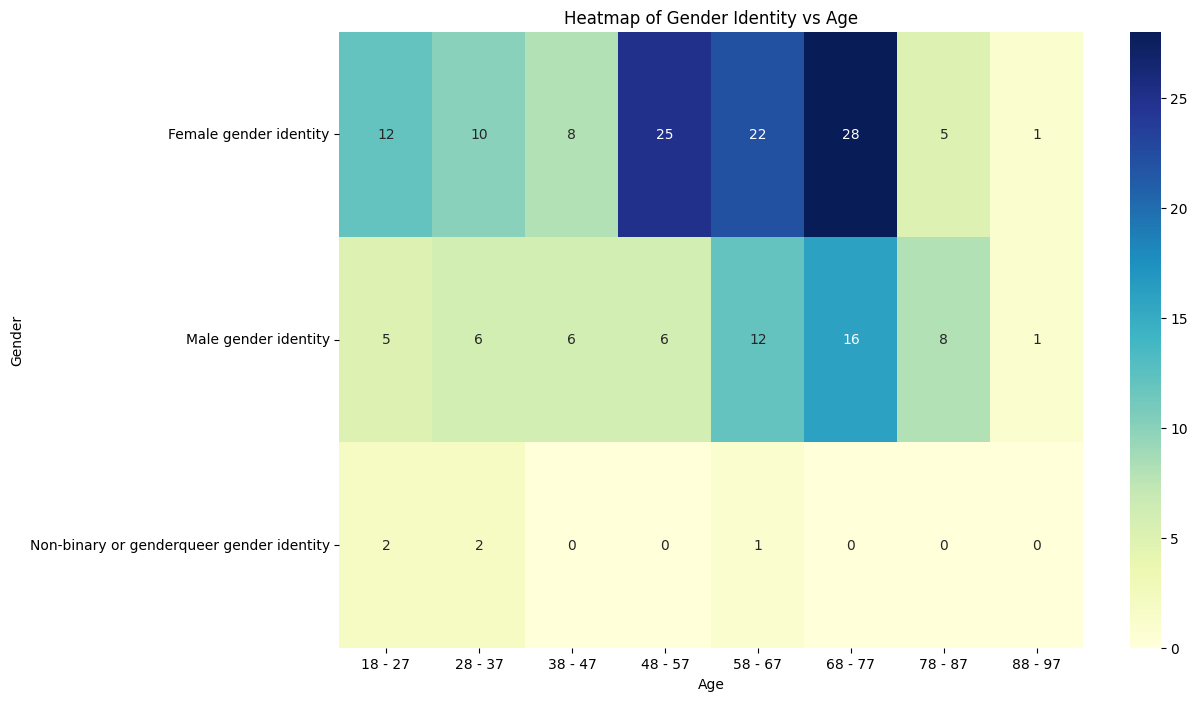

In [ ]:
# Create a cross-tabulation table
gender_age_table = pd.crosstab(combined_df['gender_identity'], combined_df['AGE'])

# Display the table
print(gender_age_table)
# Assuming stenosis_age_table is your cross-tabulation DataFrame
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(gender_age_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Add titles and labels
plt.title('Heatmap of Gender Identity vs Age')
plt.xlabel('Age')
plt.ylabel('Gender')

# Display the plot
plt.show()

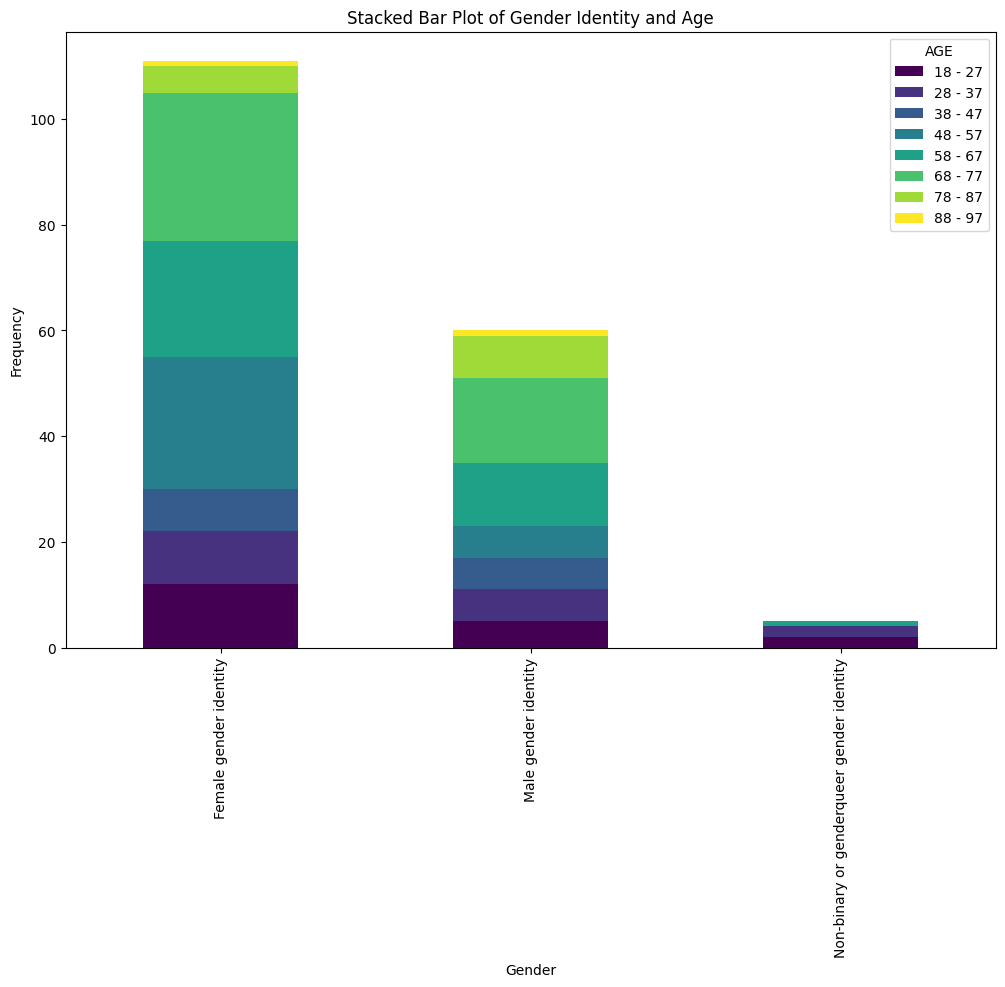

In [ ]:
# Assuming stenosis_age_table is your cross-tabulation DataFrame
gender_age_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add titles and labels
plt.title('Stacked Bar Plot of Gender Identity and Age')
plt.xlabel('Gender Identity')
plt.ylabel('Frequency')

# Display the plot
plt.show()

AGE                     18  28  38  48  58  68  78  88
enrollment_institution                                
MIT                     13   6   3   1   1   1   0   0
Mt. Sinai                0   0   0   0   6   9   7   0
USF                      4   4   5  14  17  27   4   2
VUMC                     2   8   5  15  11   6   1   0
WCM                      0   0   1   1   0   1   1   0


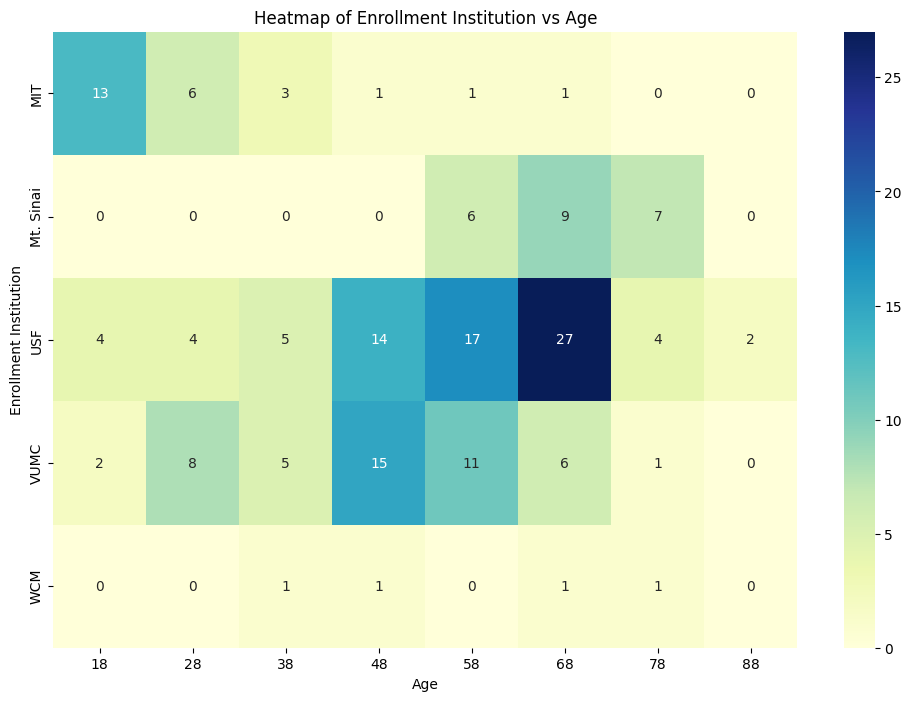

In [ ]:
# Create a cross-tabulation table
site_age_table = pd.crosstab(combined_df['enrollment_institution'], combined_df['AGE'])

# Display the table
print(site_age_table)
# Assuming stenosis_age_table is your cross-tabulation DataFrame
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(site_age_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Add titles and labels
plt.title('Heatmap of Enrollment Institution vs Age')
plt.xlabel('Age')
plt.ylabel('Enrollment Institution')

# Display the plot
plt.show()

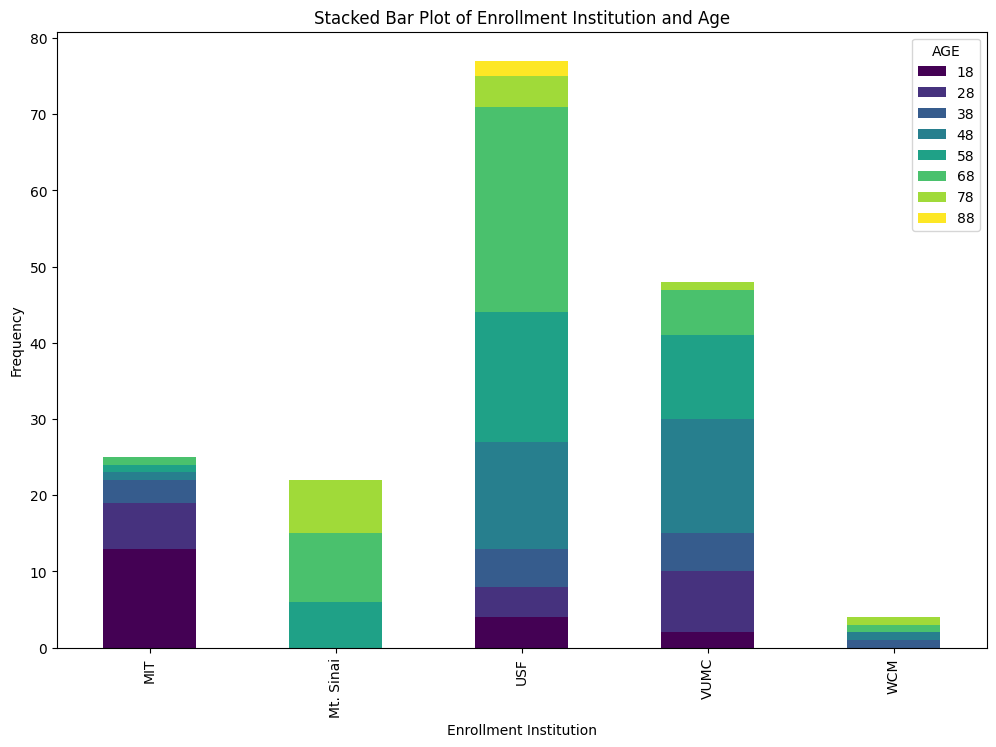

In [ ]:
# Assuming stenosis_age_table is your cross-tabulation DataFrame
site_age_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add titles and labels
plt.title('Stacked Bar Plot of Enrollment Institution and Age')
plt.xlabel('Enrollment Institution')
plt.ylabel('Frequency')

# Display the plot
plt.show()

gender_identity  Female gender identity  Male gender identity  \
AGE                                                             
18                                   12                     5   
28                                   10                     6   
38                                    8                     6   
48                                   25                     6   
58                                   22                    12   
68                                   28                    16   
78                                    5                     8   
88                                    1                     1   

gender_identity  Non-binary or genderqueer gender identity  
AGE                                                         
18                                                       2  
28                                                       2  
38                                                       0  
48                                          

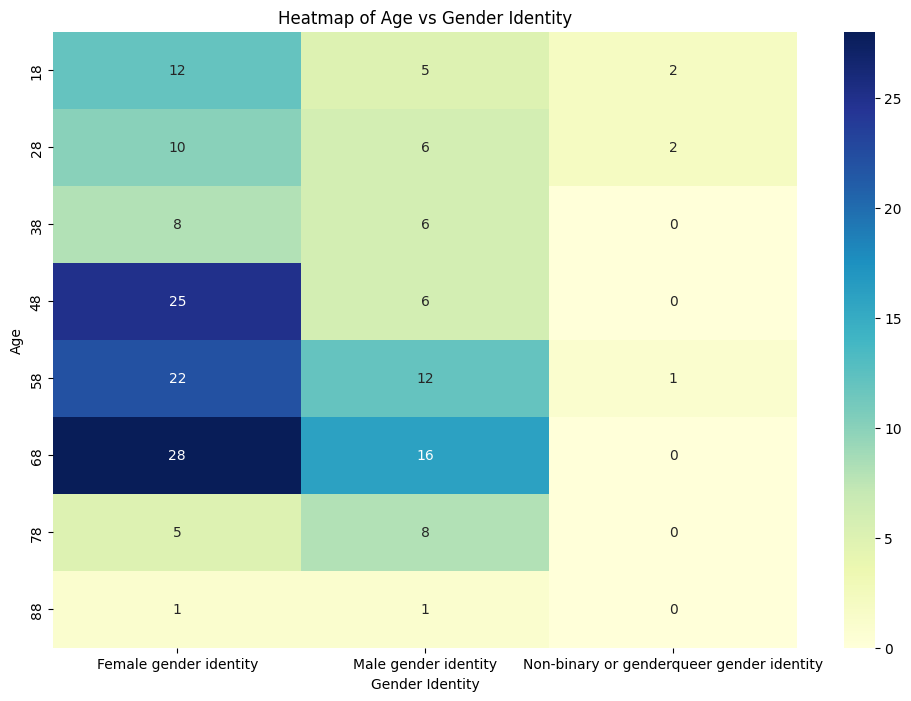

In [ ]:
# Create a cross-tabulation table
site_gender_table = pd.crosstab(combined_df['AGE'], combined_df['gender_identity'])

# Display the table
print(site_gender_table)
# Assuming stenosis_age_table is your cross-tabulation DataFrame
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(site_gender_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Add titles and labels
plt.title('Heatmap of Age vs Gender Identity')
plt.xlabel('Gender Identity')
plt.ylabel('Age')

# Display the plot
plt.show()

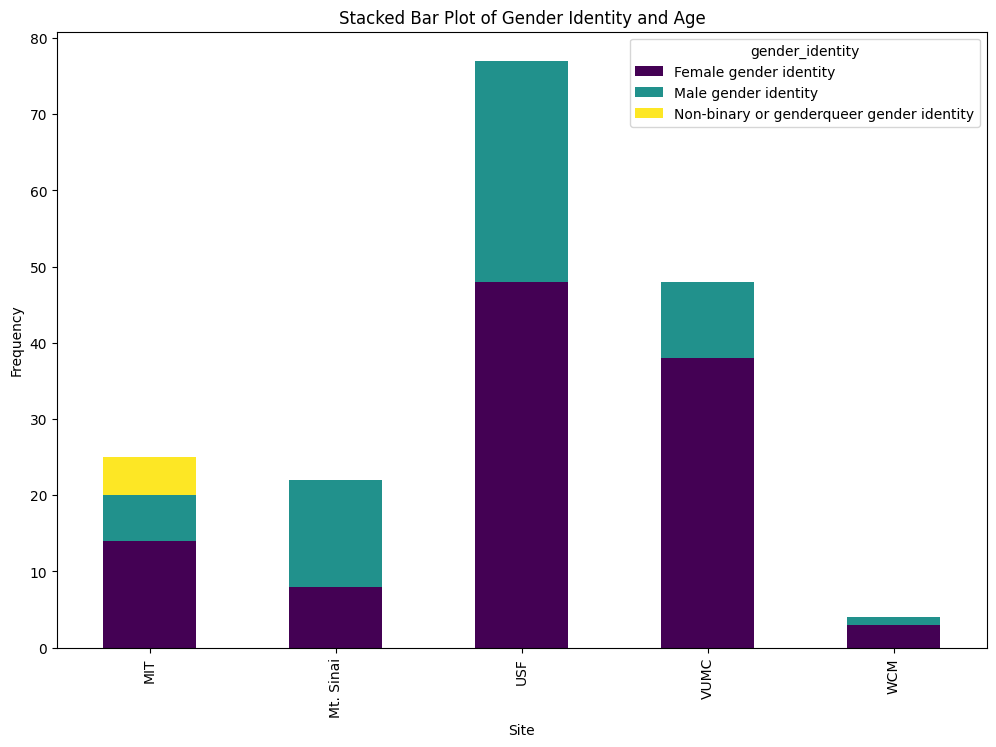

In [ ]:
# Assuming stenosis_age_table is your cross-tabulation DataFrame
site_gender_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add titles and labels
plt.title('Stacked Bar Plot of Gender Identity and Age')
plt.xlabel('Site')
plt.ylabel('Frequency')

# Display the plot
plt.show()

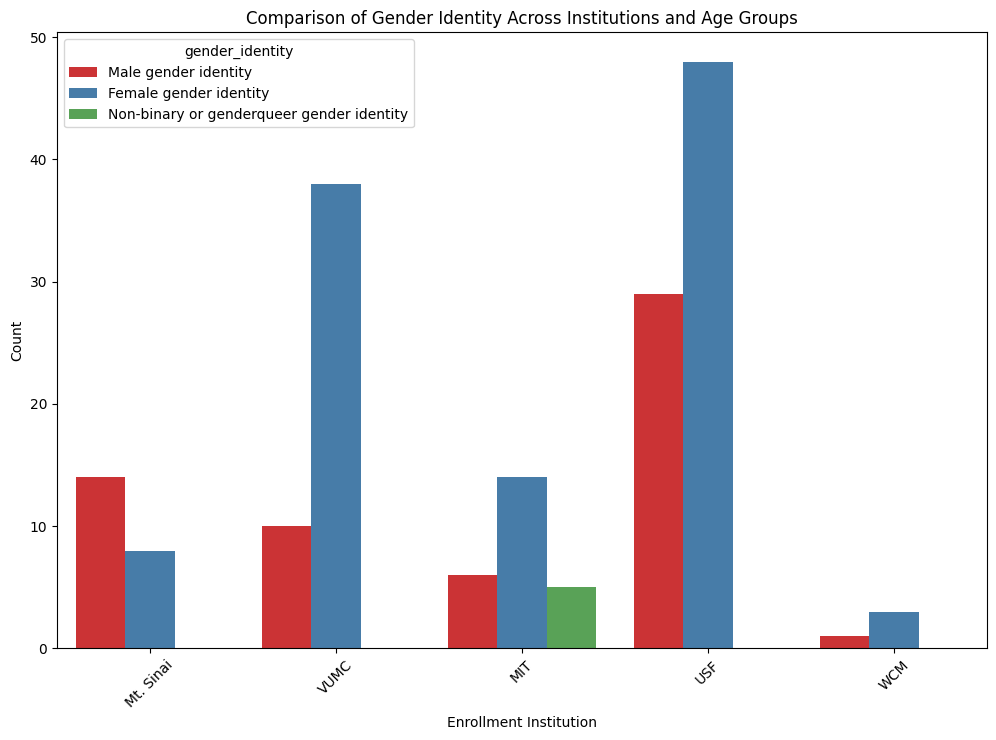

In [ ]:
# Grouped bar chart
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='enrollment_institution', hue='gender_identity', palette='Set1')
plt.title('Comparison of Gender Identity Across Institutions and Age Groups')
plt.xlabel('Enrollment Institution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
